In [1]:
import sys
sys.path.append('../')

In [2]:
import libs.db
import libs.prep_df
import pandas as pd
import sqlite3



In [3]:
sql_file = "sp10_historical.db"
conn = libs.db.create_connection(sql_file)
df = libs.db.df_from_db(conn)
libs.db.close_connection(conn)
df.head()

,id,symbol,timestamp,close
0,1,AAPL,2017-01-03T09:00:00+00:00,116.05
1,2,AAPL,2017-01-03T10:00:00+00:00,116.02
2,3,AAPL,2017-01-03T11:00:00+00:00,116.28
3,4,AAPL,2017-01-03T12:00:00+00:00,116.02
4,5,AAPL,2017-01-03T13:00:00+00:00,116.20


In [4]:
norm_df = libs.prep_df.normalize_df(df)
aapl_df = pd.DataFrame(norm_df["AAPL"])
aapl_df.head()

,AAPL
timestamp,
2017-01-03 09:00:00+00:00,116.05
2017-01-03 10:00:00+00:00,116.02
2017-01-03 11:00:00+00:00,116.28
2017-01-03 12:00:00+00:00,116.02
2017-01-03 13:00:00+00:00,116.20


In [5]:
aapl_df.tail()

,AAPL
timestamp,
2021-03-31 19:00:00+00:00,122.16
2021-03-31 20:00:00+00:00,122.00
2021-03-31 21:00:00+00:00,122.09
2021-03-31 22:00:00+00:00,122.24
2021-03-31 23:00:00+00:00,122.45


In [6]:
num_ticks = 60
for i in range(1,num_ticks):
    name = f"AAPL-{i}"
    aapl_df[name] = aapl_df["AAPL"].shift(i)
aapl_df.iloc[10:30,:]

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-50,AAPL-51,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 19:00:00+00:00,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 20:00:00+00:00,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 21:00:00+00:00,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 22:00:00+00:00,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 23:00:00+00:00,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00+00:00,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 09:00:00+00:00,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 10:00:00+00:00,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 11:00:00+00:00,116.0800,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
returns_df = pd.DataFrame()
returns_df["AAPL_24_Return"] = aapl_df["AAPL"].pct_change(periods=16).shift(-16)
returns_df["AAPL_buy"] = returns_df["AAPL_24_Return"].apply(lambda x: 1 if x > 0.005 else 0)
returns_df.tail()

,AAPL_24_Return,AAPL_buy
timestamp,,
2021-03-31 19:00:00+00:00,NaN,0
2021-03-31 20:00:00+00:00,NaN,0
2021-03-31 21:00:00+00:00,NaN,0
2021-03-31 22:00:00+00:00,NaN,0
2021-03-31 23:00:00+00:00,NaN,0


In [8]:
aapl_df = aapl_df.pct_change()
aapl_df = pd.concat([aapl_df, returns_df], axis=1)
aapl_df.dropna(inplace=True)
aapl_df.describe()

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59,AAPL_24_Return,AAPL_buy
count,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,...,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000,17004.000000
mean,0.000051,0.000051,0.000051,0.000051,0.000051,0.000051,0.000051,0.000052,0.000052,0.000052,...,0.000053,0.000053,0.000052,0.000052,0.000052,0.000052,0.000053,0.000052,0.000797,0.389555
std,0.007729,0.007729,0.007729,0.007729,0.007729,0.007729,0.007729,0.007729,0.007729,0.007729,...,0.007728,0.007728,0.007728,0.007728,0.007728,0.007728,0.007727,0.007726,0.029794,0.487664
min,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,...,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.747022,-0.750288,0.000000
25%,-0.001264,-0.001264,-0.001264,-0.001264,-0.001264,-0.001264,-0.001264,-0.001264,-0.001265,-0.001265,...,-0.001264,-0.001264,-0.001265,-0.001265,-0.001265,-0.001266,-0.001265,-0.001265,-0.006935,0.000000
50%,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.001552,0.000000
75%,0.001603,0.001603,0.001603,0.001603,0.001603,0.001603,0.001603,0.001605,0.001605,0.001603,...,0.001603,0.001603,0.001603,0.001603,0.001602,0.001602,0.001603,0.001602,0.010357,1.000000
max,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,...,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.166464,1.000000


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_24_Return"].values
y.shape

(17004,)

In [11]:
aapl_model = LinearRegression()
aapl_model.fit(X,y)
y

array([0.00881655, 0.00907241, 0.00967085, ..., 0.01835015, 0.02028211,
       0.02101226])

<AxesSubplot:>

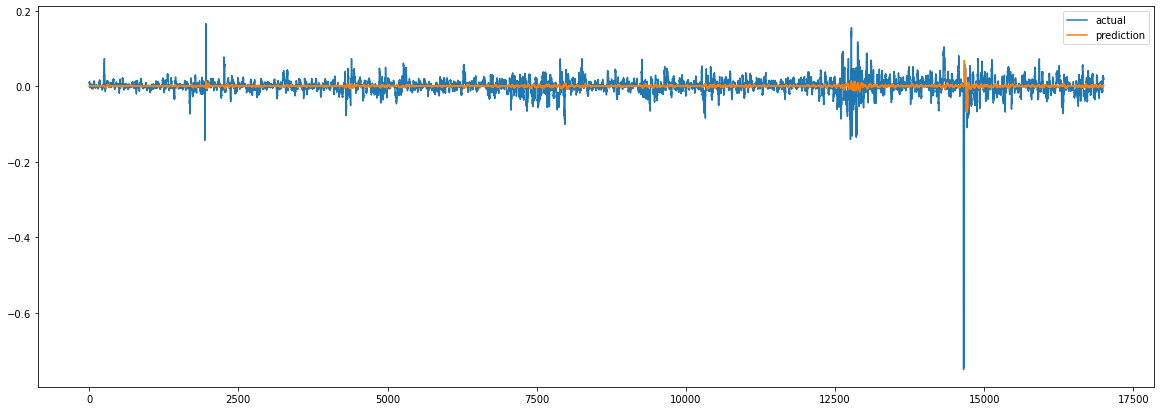

In [12]:
predicted_y_values = aapl_model.predict(X)

pd.DataFrame({ "actual": y,"prediction": predicted_y_values}).plot(figsize=(20,7))

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = aapl_model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.009069180689338374.
The r2 is 0.009069180689338374.
The mean squared error is 0.0008795969553497446.
The root mean squared error is 0.029657999854166575.
The standard deviation is 0.029793408467090294.


In [14]:
aapl_model.coef_.shape

(60,)

In [15]:
pred_df = pd.DataFrame({"actual": y, "predicted":predicted_y_values})

In [16]:
# Now do logistic regression
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_buy"].values


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6110719046498863
Testing Data Score: 0.6106798400376382


In [19]:
predictions = classifier.predict(X_test)
np.sum(predictions)

1

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2595,    0],
       [1655,    1]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.61      1.00      0.76      2595
         Buy       1.00      0.00      0.00      1656

    accuracy                           0.61      4251
   macro avg       0.81      0.50      0.38      4251
weighted avg       0.76      0.61      0.46      4251



In [22]:
print (f"{np.sum(y_test)} {np.sum(predictions)}")

1656 1


In [23]:
#Now do Random Forest
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [25]:
print (f"{np.sum(y_test)} {np.sum(rf_predictions)}")

1656 157


In [26]:
cm = confusion_matrix(y_test, rf_predictions)
print(cm)

[[2518   77]
 [1576   80]]


In [27]:
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, rf_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.62      0.97      0.75      2595
         Buy       0.51      0.05      0.09      1656

    accuracy                           0.61      4251
   macro avg       0.56      0.51      0.42      4251
weighted avg       0.57      0.61      0.49      4251



In [28]:
#Now try gradient boosted tree
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)
classifier.fit(X_train, y_train)
gboost_predictions = classifier.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, gboost_predictions)
print(cm)

[[2288  307]
 [1390  266]]


In [31]:
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, gboost_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.62      0.88      0.73      2595
         Buy       0.46      0.16      0.24      1656

    accuracy                           0.60      4251
   macro avg       0.54      0.52      0.48      4251
weighted avg       0.56      0.60      0.54      4251



In [32]:
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [33]:
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_24_Return"].values
X.shape

(17004, 60)

In [34]:
#Now do Deep Learning
from sklearn.preprocessing import MinMaxScaler

X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_24_Return"].values

#X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1),random_state=1,stratify=y)

x_scaler = MinMaxScaler()
x_scaler.fit(X)
X_train_nn = x_scaler.transform(X_train)
#X_test_nn = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_scaler.fit(y.reshape(-1,1))
y_train_nn = y_scaler.transform(y_train.reshape(-1,1))
#y_test_nn = y_scaler.transform(y_test.reshape(-1,1))

y = 0

In [35]:
X_train.shape

(12753, 60)

In [36]:
X_train_nn = X_train.reshape((X_train_nn.shape[0], X_train_nn.shape[1], 1))
#X_test_nn = X_test.reshape((X_test_nn.shape[0], X_test_nn.shape[1], 1))

In [37]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train_nn.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.fit(X_train_nn, y_train_nn, epochs=2, shuffle=False, batch_size=1, verbose=1)

Epoch 1/2
13017/13017 [==============================] - 338s 26ms/step - loss: 0.3375
Epoch 2/2
13017/13017 [==============================] - 343s 26ms/step - loss: 0.2904


In [33]:
model.evaluate(X_train_nn, y_train_nn)

407/407 [==============================] - 5s 9ms/step - loss: 0.2862


0.2861696779727936

In [34]:
predicted_nn = model.predict(X_train_nn)
predicted_nn.shape

(13017, 1)

In [36]:
predicted_prices_nn = y_scaler.inverse_transform(predicted_nn)
real_prices_nn = y_scaler.inverse_transform(y_train_nn.reshape(-1, 1))

In [37]:
predicted_nn[0:5]

array([[1.2747405],
       [1.2747405],
       [1.2747414],
       [1.2747387],
       [1.2747401]], dtype=float32)

In [38]:
real_prices_nn[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])